In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
%matplotlib inline

### 4. Bài tập áp dụng
Dữ liệu: Dữ liệu sử dụng trong lab này là dữ liệu về kích thước giáp cua. (Dữ liệu được chuẩn bị sẵn trong tập tin: crabs.txt).

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/NguyenNgocPhuoc-197CT22487/DLHS/main/DataAnalystDeepLearning/Labs/data/crabs.txt', sep = '\s+')

In [4]:
df.head()

,presz,postsz,inc,year,lf
0,113.6,127.7,14.1,NaN,0
1,118.1,133.2,15.1,NaN,0
2,119.9,135.3,15.4,NaN,0
3,126.2,143.3,17.1,NaN,0
4,126.7,139.3,12.6,NaN,0


### 1. Vẽ đồ thị scatter plot thể hiện mối tương quan giữa postmolt và premolt

Text(0.5, 1.0, 'Postmost vs Premolt')

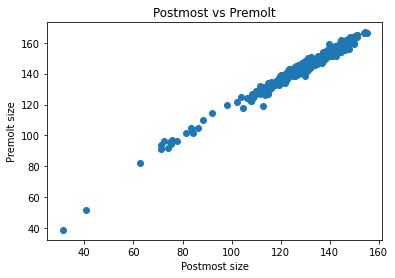

In [9]:
plt.plot(df['presz'],df['postsz'], 'o');
plt.xlabel('Postmost size')
plt.ylabel('Premolt size')
plt.title('Postmost vs Premolt')

### 2.Tính hệ số tương quan

In [11]:
print('he so tuong quan', pearsonr(df['postsz'],df['presz']))

he so tuong quan (0.9903699282533854, 0.0)


### 3.Tìm phương trình hồi quy

In [13]:
result = smf.ols('presz~postsz', df).fit()
print('Du bao', result.summary())

Du bao                             OLS Regression Results                            
Dep. Variable:                  presz   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.405e+04
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:21:18   Log-Likelihood:                -1040.6
No. Observations:                 472   AIC:                             2085.
Df Residuals:                     470   BIC:                             2094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.2137      1.001    -25.191  

In [ ]:
#Phuong trinh hoi quy : premost= -25.2137+1.0732*postmolt

## 4.dùng phương trình hồi quy để dự báo

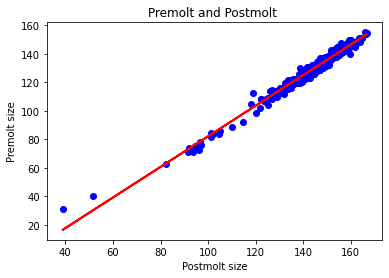

In [14]:
#y dự báo dựa vào phương trình hồi quy
sales_pred = result.predict() # predict
plt.plot(df['postsz'],df['presz'],'o', color = 'b') # plot 
plt.plot(df['postsz'],sales_pred,'r',linewidth=2) # line regression
plt.xlabel('Postmolt size')
plt.ylabel('Premolt size')
plt.title('Premolt and Postmolt ')
plt.show()

## Bài tập làm thêm: hồi quy đa biến:
#### Bài 1:
Dữ liệu: Dữ liệu sử dụng trong lab này là tập dữ liệu về lượng nhựa, nicotine, CO trong
thuốc lá cỡ king. 
(Dữ liệu được chuẩn bị sẵn trong tập tin: 04_CIGARET.xls).

In [6]:
df1 = pd.read_csv('04_CIGARET.csv')
df1.head()

,KgTar,KgNic,KgCO,MnTar,MnNic,MnCO,FLTar,FLNic,FLCO
0,20,1.1,16,16,1.1,15,5,0.4,4
1,27,1.7,16,13,0.8,17,16,1.0,19
2,27,1.7,16,16,1.0,19,17,1.2,17
3,20,1.1,16,9,0.9,9,13,0.8,18
4,20,1.1,16,14,0.8,17,13,0.8,18


In [10]:
result1 = smf.ols('KgNic~KgTar+KgCO', df1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  KgNic   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.211
Date:                Tue, 02 Nov 2021   Prob (F-statistic):              0.317
Time:                        12:31:37   Log-Likelihood:                 2.7726
No. Observations:                  25   AIC:                            0.4548
Df Residuals:                      22   BIC:                             4.111
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5937      0.793      2.010      0.057      -0.051       3.238
KgTar          0.0231      0.016      1.480      0.153      -0.009       0.055
KgCO          -0.0525      0.054     -0.975      0.340      -0.164       0.059
==============================================================================
Omnibus:                       17.071   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.215
Skew:                           1.721   Prob(JB):                     0.000111
Kurtosis:                       5.376   Cond. No.                         456.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- ta thấy giá trị F được tính là 1.211 với P-value tương ứng là 0.317 (>0.05). 
- Do P-value > 0.05 nên mô hình này cũng không có ý nghĩa thống kê.

In [14]:
df1[['KgTar','KgNic','KgCO']].corr()

,KgTar,KgNic,KgCO
KgTar,1.000000,0.245378,0.355832
KgNic,0.245378,1.000000,-0.097074
KgCO,0.355832,-0.097074,1.000000


- 2. Bạn hãy xác định phương trình hồi quy trên có thể sử dụng để dự đoán lượng nicotine tronthuốc lá khi biết lượng nhựa và CO trong thuốc lá không? 
- Vì sao có hoặc vì sao không?

In [15]:
result1 = smf.ols('MnNic~MnTar+MnCO', df1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  MnNic   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     118.8
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           1.62e-12
Time:                        12:38:25   Log-Likelihood:                 31.318
No. Observations:                  25   AIC:                            -56.64
Df Residuals:                      22   BIC:                            -52.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2507      0.057      4.399      0.000       0.133       0.369
MnTar          0.1007      0.008     12.503      0.000       0.084       0.117
MnCO          -0.0454      0.007     -6.305      0.000      -0.060      -0.030
==============================================================================
Omnibus:                        3.270   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.797
Skew:                          -0.606   Prob(JB):                        0.407
Kurtosis:                       3.508   Cond. No.                         79.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- ta thấy giá trị F được tính là 118.8 => quá ớnvới P-value tương ứng là 1.62e-12 (< 0.05). 
 nên mô hình này cũng không có ý nghĩa thống kê.

In [16]:
df1[['MnNic','MnTar','MnCO']].corr()

,MnNic,MnTar,MnCO
MnNic,1.000000,0.873034,0.559662
MnTar,0.873034,1.000000,0.865523
MnCO,0.559662,0.865523,1.000000


### Bài 2:
Dữ liệu: Dữ liệu sử dụng trong lab này là dữ liệu về giá bán nhà. (Dữ liệu được chuẩn bị sẵn
trong tập tin: 23_HOMES.xls)

In [18]:
df2 = pd.read_csv('23_HOMES.csv')
df2.head()

,Selling_Price,List_Price,Area,Acres,Age,Taxes,Rooms,Bedrooms,Baths_full
0,400000,414000,2704,2.27,27,4920,9,3,3
1,370000,379000,2096,0.75,21,4113,8,4,2
2,382500,389900,2737,1.00,36,6072,9,4,2
3,300000,299900,1800,0.43,34,4024,8,4,2
4,305000,319900,1066,3.60,69,3562,6,3,2


#### 1. Nếu chỉ sử dụng 1 biến x để dự đoán giá nhà, phương trình hồi quy 1 biến dự đoán (predictor) nào sau đây là tốt nhất? Tại sao?

In [20]:
result2 = smf.ols('Selling_Price~List_Price+Area', df2).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  MnNic   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     118.8
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           1.62e-12
Time:                        13:04:32   Log-Likelihood:                 31.318
No. Observations:                  25   AIC:                            -56.64
Df Residuals:                      22   BIC:                            -52.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2507      0.057      4.399      0.000       0.133       0.369
MnTar          0.1007      0.008     12.503      0.000       0.084       0.117
MnCO          -0.0454      0.007     -6.305      0.000      -0.060      -0.030
==============================================================================
Omnibus:                        3.270   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.797
Skew:                          -0.606   Prob(JB):                        0.407
Kurtosis:                       3.508   Cond. No.                         79.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

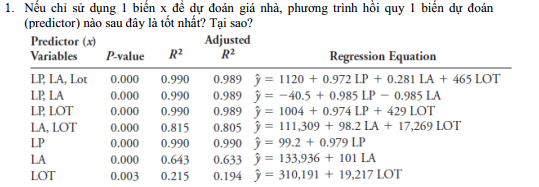

## Chọn x = Lb để dự đoán giá nhà là tốt nhất R2 và Adjusted R2 lớn nhất

### 2. Nếu sử dụng đúng 2 biến dự đoán để dự đoán giá nhà, phương trình hồi quy 2 biến dự
đoán (predictor) nào ở trên là tốt nhất? Tại sao?
### => chọn 2 biến LP, LA hoặc LP, LOT đều tốt vì R2 và Adjusted R2 lớn nhất

### 3. Phương trình hồi quy nào trong số các phương trình hồi quy trên là tốt nhất để dự đoán giá nhà? Tại sao?
### => phương trình có các biến x là tốt nhất
- LP, LA, Lot
- LP, LA
- LP, LOT


### 4. Một ngôi nhà được rao bán với giá niêm yết 400.000 USD, nó có diện tích là 3000 feet
vuông, và diện tích đất rộng 2 mẫu. Giá trị dự đoán tốt nhất của giá bán là bao nhiêu? Giá
bán dự đoán có thể là ước lượng tốt hay không? Giá trị dự đoán đó có khả năng rất chính
xác không?

In [28]:
df2.head()

,Selling_Price,List_Price,Area,Acres,Age,Taxes,Rooms,Bedrooms,Baths_full
0,400000,414000,2704,2.27,27,4920,9,3,3
1,370000,379000,2096,0.75,21,4113,8,4,2
2,382500,389900,2737,1.00,36,6072,9,4,2
3,300000,299900,1800,0.43,34,4024,8,4,2
4,305000,319900,1066,3.60,69,3562,6,3,2


In [29]:
result2 = smf.ols('Selling_Price~List_Price+Area+Acres', df2).fit()
# sales_pred = result2.predict()

In [ ]:
result2.predict('400000','3000','2')

ERROR! Session/line number was not unique in database. History logging moved to new session 145


In [30]:
x0 = pd.DataFrame([{"List_Price":400000,"Area": 3000, "Acres": 2}])
x0

,List_Price,Area,Acres
0,400000,3000,2


In [31]:
p = result2.get_prediction(x0)
p.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,391749.115891,3113.590544,385434.461587,398063.770195,373005.689826,410492.541956


In [32]:
result2.predict(x0)

0    391749.115891
dtype: float64

## giá bán 391749.115891